In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from scipy.stats import ttest_ind, f_oneway, ttest_rel, shapiro
from scipy.stats import kruskal, wilcoxon
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = ('ESSdata_Thinkful.csv')
df = pd.read_csv(data,delimiter=",",header=0)

In [17]:
data = df.dropna()
data = data.fillna(data.median())
data.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

In [23]:
data_2012 = data[data['year'] == 6]
data_2014 = data[data['year'] == 7]

In [96]:
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

Text(0.07,0.5,'Trust Level')

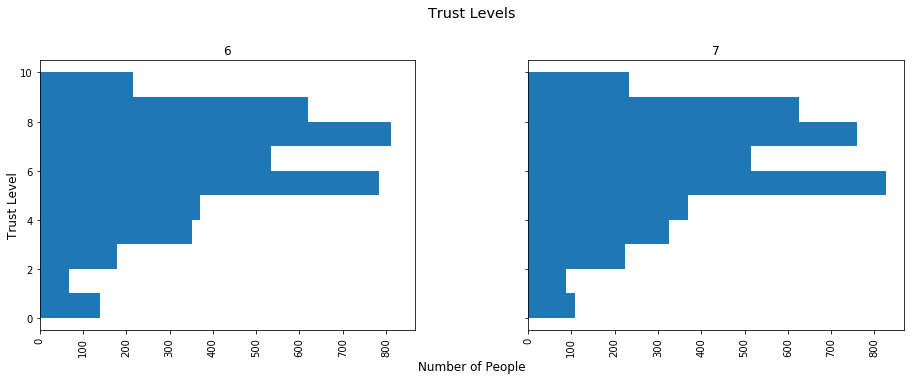

In [119]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,5))

data.hist(by='year', column='ppltrst', ax=axes, orientation='horizontal')

plt.suptitle('Trust Levels', x=0.5, y=1.05, ha='center', fontsize='x-large')
fig.text(0.5, 0.04, 'Number of People', ha='center', fontsize='large')
fig.text(0.07, 0.5, 'Trust Level', va='center', rotation='vertical', fontsize='large')

In [121]:
#ks test
from scipy.stats import kstest
print(kstest(data_2012['ppltrst'], 'norm'))
print(kstest(data_2014['ppltrst'], 'norm'))

KstestResult(statistic=0.9264024104247022, pvalue=0.0)
KstestResult(statistic=0.9289181703089356, pvalue=0.0)


In [122]:
#Mann Whitney U test
stats.mannwhitneyu(data_2012['ppltrst'],data_2014['ppltrst'])

MannwhitneyuResult(statistic=8260446.0, pvalue=0.364910173807647)

In [27]:
for each in np.unique(data['cntry']):
    print(each)
    print(stats.mannwhitneyu(data_2012[data_2012['cntry']==each]['ppltrst'],
                          data_2014[data_2014['cntry']==each]['ppltrst']))

CH
MannwhitneyuResult(statistic=267361.0, pvalue=0.28548480842716395)
CZ
MannwhitneyuResult(statistic=182068.0, pvalue=0.49770792998106145)
DE
MannwhitneyuResult(statistic=84.0, pvalue=0.3741417871944901)
ES
MannwhitneyuResult(statistic=617480.0, pvalue=0.006194821052719307)
NO
MannwhitneyuResult(statistic=248611.0, pvalue=0.3246607781543741)
SE
MannwhitneyuResult(statistic=350787.5, pvalue=0.017080947275388083)


Non-normal distribution lead me to pick a non-parametric test (Mann Whitney U), which indicates that, excluding Spain and Sweden, were below the p-value < 0.05 threshold. 

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

Text(0.07,0.5,'Happiness')

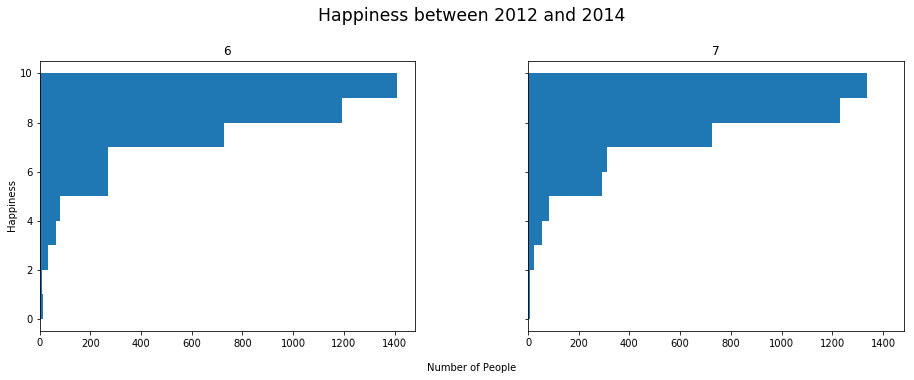

In [120]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,5))

data.hist(by='year', column='happy', ax=axes, xrot=1, orientation='horizontal')

plt.suptitle('Happiness between 2012 and 2014', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Number of People', ha='center')
fig.text(0.07, 0.5, 'Happiness', va='center', rotation='vertical')

In [123]:
#Kruskal, Ks
print(kstest(data_2012['happy'], 'norm'))
print(kstest(data_2014['happy'], 'norm'))
stats.kruskal(data_2012['happy'],data_2014['happy'])

KstestResult(statistic=0.9846486281290184, pvalue=0.0)
KstestResult(statistic=0.9885912207122365, pvalue=0.0)


KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

Kruskal-Wallis test indicates no significant different in happiness between 2012 and 2014. 

In [124]:
#Mann Whitney
stats.mannwhitneyu(data_2012['happy'],data_2014['happy'])

MannwhitneyuResult(statistic=8096343.0, pvalue=0.02679503248642277)

In [36]:
for each in np.unique(data['cntry']):
    print(each)
    print(stats.mannwhitneyu(data_2012[data_2012['cntry']==each]['happy'],
                          data_2014[data_2014['cntry']==each]['happy']))

CH
MannwhitneyuResult(statistic=265131.5, pvalue=0.19495027197081582)
CZ
MannwhitneyuResult(statistic=176796.0, pvalue=0.18724347670459124)
DE
MannwhitneyuResult(statistic=73.5, pvalue=0.19313536018324134)
ES
MannwhitneyuResult(statistic=629830.0, pvalue=0.04263522765394516)
NO
MannwhitneyuResult(statistic=220453.5, pvalue=1.2346345897635287e-05)
SE
MannwhitneyuResult(statistic=369192.0, pvalue=0.37586498218551584)


Excluding Spain and Norway, the other four countries showed no significant difference in happiness between 2012 and 2014. 

## 3. Who reported watching more TV in 2012, men or women?

In [64]:
data_2012['gndr'].value_counts()

1.0    2053
2.0    2018
Name: gndr, dtype: int64

		Distribution of Total TV Watching in 2012 for Men and Women


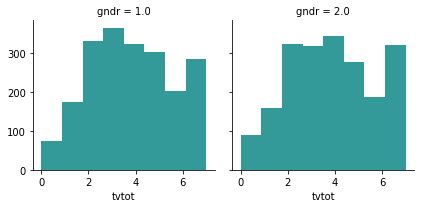

Males (1.0): (0.9443334937095642, 3.718612884828085e-27)
Females (2.0): (0.9407297372817993, 1.0867231118970029e-27)


In [125]:
#shapiro-wilk test
Gender_2012 = sns.FacetGrid(data_2012, col='gndr', dropna=True, sharey=True)
Gender_2012 = Gender_2012.map(plt.hist, 'tvtot', alpha=0.8, color='teal', bins=8)
# Adding a title
print('\t\tDistribution of Total TV Watching in 2012 for Men and Women')
plt.show()

print('Males (1.0):', shapiro(data_2012[data_2012.gndr ==1].tvtot))
print('Females (2.0):', shapiro(data_2012[data_2012.gndr ==2].tvtot))

In [139]:
print('Wilcoxon Test:', wilcoxon(data_2012[data_2012.gndr == 1].tvtot.dropna()[:2018], 
                                 y=data_2012[data_2012.gndr == 2].tvtot.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=713031.0, pvalue=0.5367584843203085)


The Wilcoxon Test shows no significant different between genders and TV views in 2012. 

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

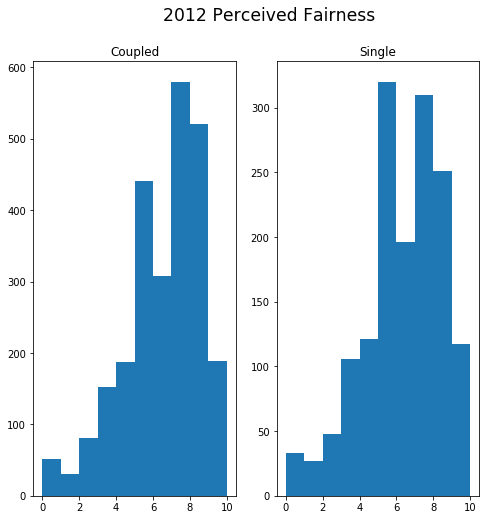

In [81]:
data_partner = data['pplfair'][(data['partner'] == 1.0) & (data['year'] == 6)]
data_single = data['pplfair'][(data['partner'] == 2.0) & (data['year'] == 6)]

fig, ax1 = plt.subplots(1, 2, figsize=(8, 8))

ax1[0].hist(data_partner)
ax1[1].hist(data_single)

fig.text(0.35, 0.95, '2012 Perceived Fairness', fontsize='xx-large')
ax1[0].set_title('Coupled')
ax1[1].set_title('Single')
    
plt.show()

In [134]:
#t-test
print('The mean perceived, partner: ' + str(data_partner.mean()))
print('The mean perceived, single: ' + str(data_single.mean()))  
print(stats.ttest_ind(data_partner, data_single))

The mean perceived, partner: 6.0743509047993705
The mean perceived, single: 5.86592544146501
Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)


The independent t-test (statistically meaningful) indicates those with a significant other were more likely to judge people as fair when compared to their single counterparts. 

## 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [91]:
data_cntry = data['cntry'].unique().tolist()

In [94]:
social_2014 = data_cntry[1:4]
print(social_2014)

['CZ', 'DE', 'ES']


In [101]:
CZ_social = data_2014['sclmeet'][(data_2014['cntry']=='CZ')]
DE_social = data_2014['sclmeet'][(data_2014['cntry']=='DE')]
ES_social = data_2014['sclmeet'][(data_2014['cntry']=='ES')]

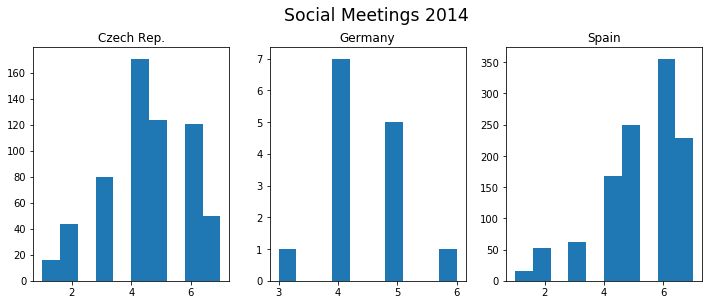

In [103]:
fig, ax1 = plt.subplots(1, 3, figsize=(10, 4))

ax1[0].hist(CZ_social)
ax1[1].hist(DE_social)
ax1[2].hist(ES_social)

fig.text(0.4, 1, 'Social Meetings 2014', fontsize='xx-large')
ax1[0].set_title('Czech Rep.')
ax1[1].set_title('Germany')
ax1[2].set_title('Spain')
    
plt.tight_layout()
plt.show()

In [109]:
#ANOVA one-way
F, p = stats.f_oneway(CZ_social, DE_social, ES_social)

print('F score: ' + str(F))
print('P-value: ' + str(p))
print('Czech_soc mean: ' + str(CZ_social.mean()))
print('German_soc mean: ' + str(DE_social.mean()))
print('Spain_soc mean: ' + str(ES_social.mean()))

F score: 56.89670103430699
P-value: 1.1476834261467194e-24
Czech_soc mean: 4.4950495049504955
German_soc mean: 4.428571428571429
Spain_soc mean: 5.263668430335097


In [110]:
print('CZ and DE: ' + str(stats.ttest_ind(CZ_social, DE_social)))
print('CZ and ES: ' + str(stats.ttest_ind(CZ_social, ES_social)))
print('DE and ES: ' + str(stats.ttest_ind(DE_social, ES_social)))

CZ and DE: Ttest_indResult(statistic=0.16846066305094798, pvalue=0.8662760053993819)
CZ and ES: Ttest_indResult(statistic=-10.538036641317998, pvalue=3.262659263756715e-25)
DE and ES: Ttest_indResult(statistic=-2.168865565712128, pvalue=0.030298013218196748)


The ANOVA one-way test indicates statistical significance/significant difference amongst the three countries. T-tests show that, apart from the CZ-DE pairing, the other two pairs are significantly different. 

## 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [112]:
socialact_2014 = data_cntry[3:6]
print(socialact_2014)

['ES', 'NO', 'SE']


In [115]:
NO_socialact = data_2014['sclact'][(data_2014['cntry']=='NO')]
SE_socialact = data_2014['sclact'][(data_2014['cntry']=='SE')]
ES_socialact = data_2014['sclact'][(data_2014['cntry']=='ES')]

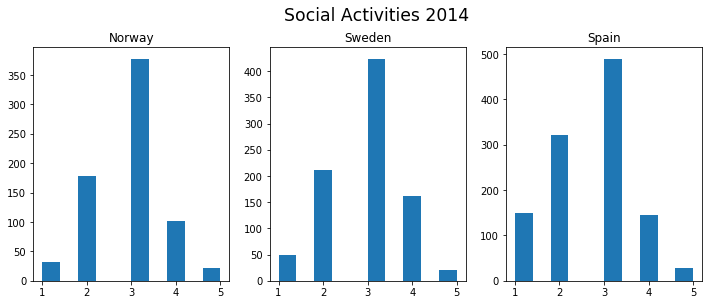

In [116]:
fig, ax1 = plt.subplots(1, 3, figsize=(10, 4))

ax1[0].hist(NO_socialact)
ax1[1].hist(SE_socialact)
ax1[2].hist(ES_socialact)

fig.text(0.4, 1, 'Social Activities 2014', fontsize='xx-large')
ax1[0].set_title('Norway')
ax1[1].set_title('Sweden')
ax1[2].set_title('Spain')
    
plt.tight_layout()
plt.show()

In [117]:
#ANOVA one-way
F, p = stats.f_oneway(NO_socialact, SE_socialact, ES_socialact)

print('F score: ' + str(F))
print('P-value: ' + str(p))
print('Czech_soc mean: ' + str(NO_socialact.mean()))
print('German_soc mean: ' + str(SE_socialact.mean()))
print('Spain_soc mean: ' + str(ES_socialact.mean()))

F score: 23.994028014859197
P-value: 4.685034666506116e-11
Czech_soc mean: 2.860955056179775
German_soc mean: 2.878892733564014
Spain_soc mean: 2.631393298059965


In [118]:
print('NO and SE: ' + str(stats.ttest_ind(NO_socialact, SE_socialact)))
print('SE and ES: ' + str(stats.ttest_ind(SE_socialact, ES_socialact)))
print('NO and ES: ' + str(stats.ttest_ind(NO_socialact, ES_socialact)))

NO and SE: Ttest_indResult(statistic=-0.42094459733257983, pvalue=0.6738528977365044)
SE and ES: Ttest_indResult(statistic=6.012700644386077, pvalue=2.163487662927079e-09)
NO and ES: Ttest_indResult(statistic=5.31751240602575, pvalue=1.1799291265139793e-07)


The ANOVA one-way test indicates statistical significance/significant difference amongst the three countries. T-tests show that, apart from the NO-SE pairing, the other two pairs are significantly different. 